In [41]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [42]:
df_sos = pd.read_csv("data/sensitivity-size-of-std-table.zip",skiprows=6)
df_iom = pd.read_csv("data/sensitivity-migration-influx-table.zip",skiprows=6)
df_aim = pd.read_csv("data/sensitivity-migration-income-table.zip",skiprows=6)

In [43]:
#remove all the columns that have the same value in all rows.
for c in df_sos.columns:
    if len(df_sos[c].unique()) < 2:
        df_sos = df_sos.drop(columns=c)
for c in df_iom.columns:
    if len(df_iom[c].unique()) < 2:
        df_iom = df_iom.drop(columns=c)
for c in df_aim.columns:
    if len(df_aim[c].unique()) < 2:
        df_aim = df_aim.drop(columns=c)

In [44]:
#remove all rows with no data, these are usually the rows at the start of a run.
l = []
for r in df_sos.index:
    if len(df_sos.iloc[r,22:].unique())<2:
        l.append(r)

df_sos = df_sos.drop(index=l)

In [45]:
#remove all rows with no data, these are usually the rows at the start of a run.
l = []
for r in df_iom.index:
    if len(df_iom.iloc[r,22:].unique())<2:
        l.append(r)

df_iom = df_iom.drop(index=l)

In [46]:
#remove all rows with no data, these are usually the rows at the start of a run.
l = []
for r in df_aim.index:
    if len(df_aim.iloc[r,22:].unique())<2:
        l.append(r)

df_aim = df_aim.drop(index=l)

In [47]:
#I found this code to make dict from long list.
def listToDict(lst):
    op = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return op

In [51]:
#This will take two eons of time, please don't run this code unless you really need to.
steps = []
n_steps = 5125 
for index, row in tqdm(df_sos.iloc[:n_steps,:].iterrows(), total=n_steps):
    l = []
    for column in df_sos.columns[:5]:
        x = row[column]
        new_df = pd.DataFrame(index=np.arange(0,114), columns=[column])
        new_df[column] = x
        l.append(new_df)
    for column in df_sos.columns[5:]:
        x = row[column].replace("[","").replace("]","").split(" ")
        d = listToDict(x)
        new_df = pd.DataFrame(index=np.arange(0, len(d)), columns=['Neighborhood number', column])
        new_df['Neighborhood number'] = [*d]
        new_df[column] = list(d.values())
        l.append(new_df)
    steps.append(pd.concat(l, axis=1))
full_df_sos = pd.concat(steps).loc[:,~pd.concat(steps).columns.duplicated()].convert_dtypes()

100%|█████████████████████████████████████████████████████████████████████████████▉| 5120/5125 [03:05<00:00, 27.58it/s]


In [52]:
#This will take two eons of time, please don't run this code unless you really need to.
steps = []
n_steps = 5125 
for index, row in tqdm(df_iom.iloc[:n_steps,:].iterrows(), total=n_steps):
    l = []
    for column in df_iom.columns[:5]:
        x = row[column]
        new_df = pd.DataFrame(index=np.arange(0,114), columns=[column])
        new_df[column] = x
        l.append(new_df)
    for column in df_iom.columns[5:]:
        x = row[column].replace("[","").replace("]","").split(" ")
        d = listToDict(x)
        new_df = pd.DataFrame(index=np.arange(0, len(d)), columns=['Neighborhood number', column])
        new_df['Neighborhood number'] = [*d]
        new_df[column] = list(d.values())
        l.append(new_df)
    steps.append(pd.concat(l, axis=1))
full_df_iom = pd.concat(steps).loc[:,~pd.concat(steps).columns.duplicated()].convert_dtypes()

100%|█████████████████████████████████████████████████████████████████████████████▉| 5120/5125 [03:05<00:00, 27.59it/s]


In [53]:
#This will take two eons of time, please don't run this code unless you really need to.
steps = []
n_steps = 5125 
for index, row in tqdm(df_aim.iloc[:n_steps,:].iterrows(), total=n_steps):
    l = []
    for column in df_aim.columns[:5]:
        x = row[column]
        new_df = pd.DataFrame(index=np.arange(0,114), columns=[column])
        new_df[column] = x
        l.append(new_df)
    for column in df_aim.columns[5:]:
        x = row[column].replace("[","").replace("]","").split(" ")
        d = listToDict(x)
        new_df = pd.DataFrame(index=np.arange(0, len(d)), columns=['Neighborhood number', column])
        new_df['Neighborhood number'] = [*d]
        new_df[column] = list(d.values())
        l.append(new_df)
    steps.append(pd.concat(l, axis=1))
full_df_aim = pd.concat(steps).loc[:,~pd.concat(steps).columns.duplicated()].convert_dtypes()

100%|█████████████████████████████████████████████████████████████████████████████▉| 5120/5125 [03:03<00:00, 27.91it/s]


In [157]:
full_df_sos = full_df_sos.astype(float)
full_df_iom = full_df_iom.astype(float)
full_df_aim = full_df_aim.astype(float)

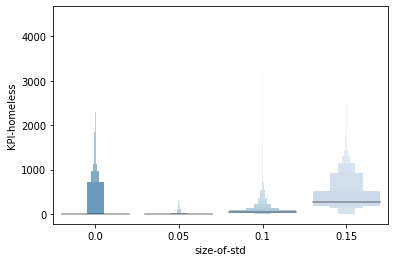

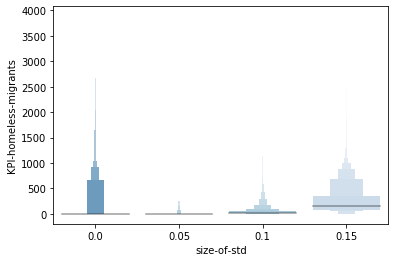

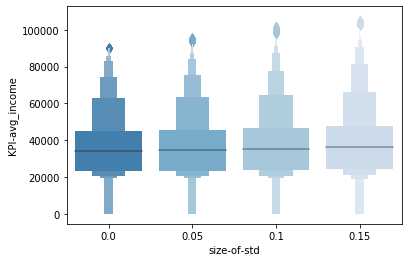

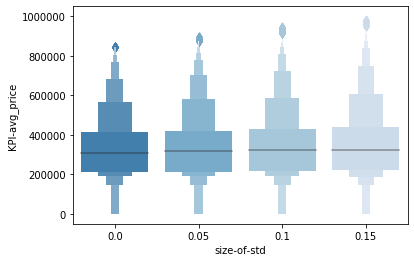

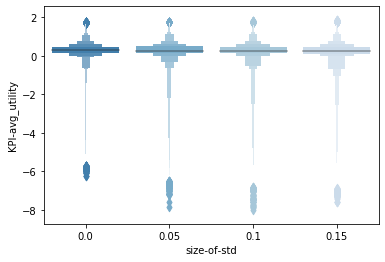

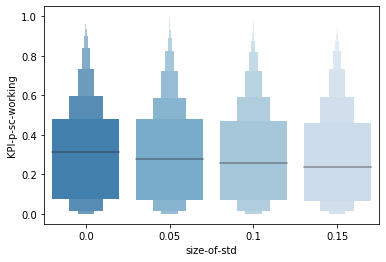

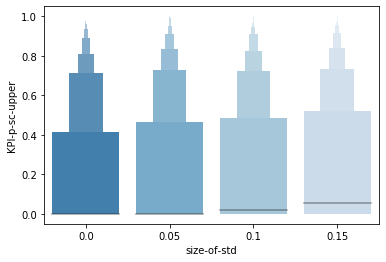

In [115]:
for KPI in ['KPI-homeless','KPI-homeless-migrants','KPI-avg_income','KPI-avg_price','KPI-avg_utility','KPI-p-sc-working','KPI-p-sc-upper']:
    plt.figure()
    sns.boxenplot(x="size-of-std",y=KPI,palette="tab20c",data=full_df_sos.astype(float))
    plt.savefig("output/images/sensitivity_std_"+KPI+".png")
    plt.show()

In [122]:
full_df_aim.columns

Index(['[run number]', 'avg_migrant_income', '[step]', 'KPI-homeless',
       'KPI-homeless-migrants', 'Neighborhood number',
       'KPI-available_buy_houses', 'KPI-available_part_rent_houses',
       'KPI-available_social_rent_houses', 'KPI-avg_income', 'KPI-avg_price',
       'KPI-avg_utility', 'KPI-citizen-count', 'KPI-p-sc-lower',
       'KPI-p-sc-working', 'KPI-p-sc-middle', 'KPI-p-sc-upper', 'KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern'],
      dtype='object')

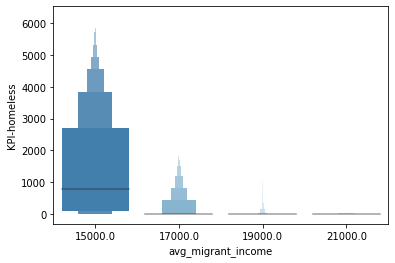

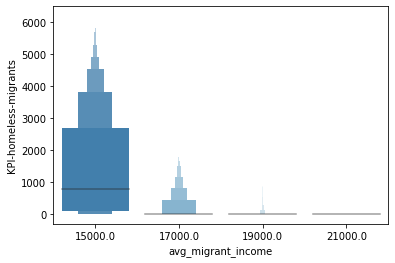

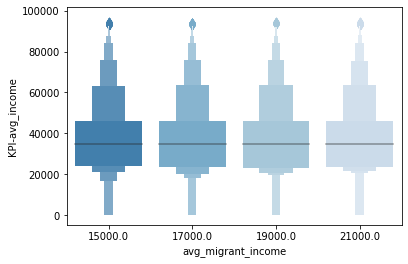

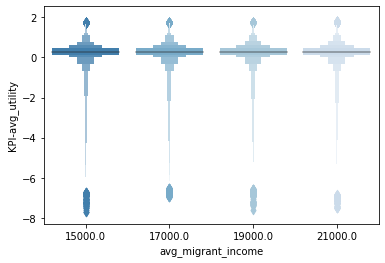

In [125]:
for KPI in ['KPI-homeless','KPI-homeless-migrants','KPI-avg_income','KPI-avg_utility']:
    plt.figure()
    sns.boxenplot(x='avg_migrant_income',y=KPI,palette="tab20c",data=full_df_aim.astype(float))
    plt.savefig("output/images/sensitivity_mincome_"+KPI+".png")
    plt.show()

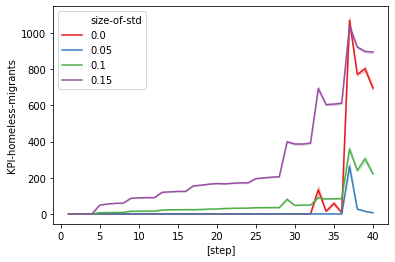

In [167]:
sns.lineplot(x="[step]", y='KPI-homeless-migrants',hue="size-of-std",data=full_df_sos,palette="Set1")
plt.savefig("output/images/timeline_homeless_std.png")

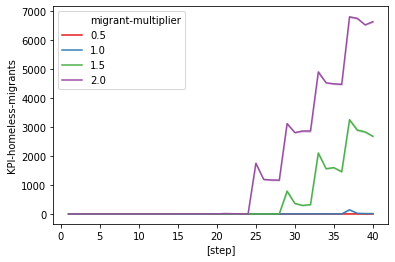

In [168]:
sns.lineplot(x="[step]", y='KPI-homeless-migrants',hue="migrant-multiplier",data=full_df_iom,palette="Set1")
plt.savefig("output/images/timeline_homeless_influx.png")

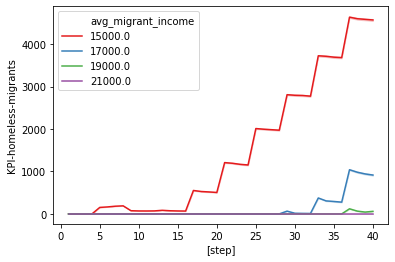

In [169]:
sns.lineplot(x="[step]", y='KPI-homeless-migrants',hue="avg_migrant_income",data=full_df_aim,palette="Set1")
plt.savefig("output/images/timeline_homeless_mincome.png")